# 2.0 Test on MNIST

In [1]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)
df = {}

import clustergrammer_groupby as cby
import gene_exp_10x

In [2]:
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
from copy import deepcopy

import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
net.load_file('../data/mnist.txt')
net.normalize(axis='row', norm_type='zscore')
df['ini'] = net.export_df()
df['ini'].shape

(784, 200)

In [4]:
net.load_df(df['ini'])
net.set_cat_color(axis='col', cat_index=1, cat_name='Digit: Zero', inst_color='yellow')
net.set_cat_color(axis='col', cat_index=1, cat_name='Digit: One', inst_color='red')
net.set_cat_color(axis='col', cat_index=1, cat_name='Digit: Two', inst_color='blue')
net.set_cat_color(axis='col', cat_index=1, cat_name='Digit: Three', inst_color='green')
net.set_cat_color(axis='col', cat_index=1, cat_name='Digit: Four', inst_color='black')
net.set_cat_color(axis='col', cat_index=1, cat_name='Digit: Five', inst_color='orange')
net.set_cat_color(axis='col', cat_index=1, cat_name='Digit: Six', inst_color='purple')
net.set_cat_color(axis='col', cat_index=1, cat_name='Digit: Seven', inst_color='grey')
net.set_cat_color(axis='col', cat_index=1, cat_name='Digit: Eight', inst_color='white')
net.set_cat_color(axis='col', cat_index=1, cat_name='Digit: Nine', inst_color='brown')

In [5]:
net.load_df(df['ini'])
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


In [6]:
pval_cutoff = 0.001
df['cat_sig'], keep_genes, keep_genes_dict = cby.generate_signatures(df['ini'], 'Digit', 
                                                                     pval_cutoff=pval_cutoff)
print(df['cat_sig'].shape)
df['pred_cat'], df['sig_sim'], df['sig_max'], y_info = cby.predict_cats_from_sigs(df['ini'], df['cat_sig'], 
                                                                                  predict_level='Predict Digit')

df['conf'], true_count, pred_count, ser_correct, fraction_correct = cby.confusion_matrix_and_correct_series(y_info)
real_fraction_correct = deepcopy(fraction_correct)
print(real_fraction_correct)

(396, 10)
0.89


/Users/nickfernandez/anaconda/envs/py35/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/nickfernandez/anaconda/envs/py35/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/nickfernandez/anaconda/envs/py35/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [7]:
df['cat_sig'].shape

(396, 10)

In [8]:
net.load_df(df['cat_sig'])
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


### View Predictions

In [9]:
net.load_df(df['pred_cat'])
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Digit: Zero', inst_color='yellow')
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Digit: One', inst_color='red')
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Digit: Two', inst_color='blue')
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Digit: Three', inst_color='green')
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Digit: Four', inst_color='black')
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Digit: Five', inst_color='orange')
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Digit: Six', inst_color='purple')
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Digit: Seven', inst_color='grey')
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Digit: Eight', inst_color='white')
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Digit: Nine', inst_color='brown')

In [10]:
net.load_df(df['pred_cat'].ix[keep_genes])
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


In [11]:
net.load_df(df['sig_max'])
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


In [12]:
net.load_df(df['conf'])
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


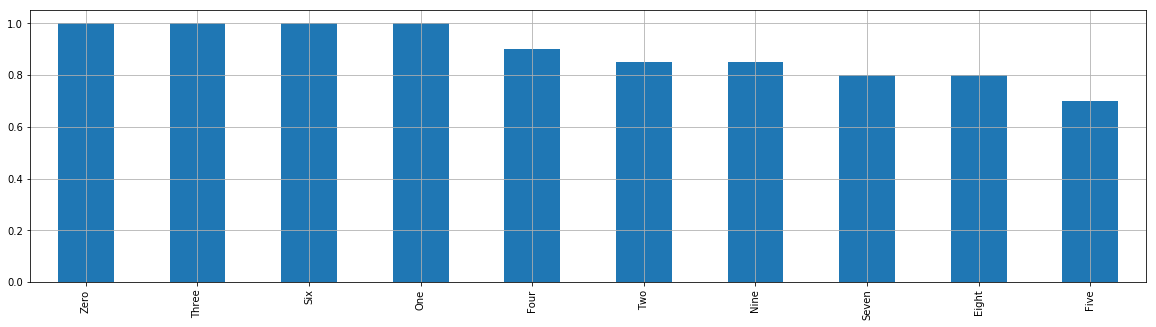

In [13]:
ser_correct.sort_values(ascending=False).plot(kind='bar', figsize=(20,5), grid=True)

# Shuffle

In [14]:
%%time
num_shuffles = 100
perform_ser = cby.compare_performance_to_shuffled_labels(df['ini'], df['cat_sig'], 'Digit', 
                                                         num_shuffles=num_shuffles, pval_cutoff=pval_cutoff)
print('mean: ', perform_ser.mean(), 'std: ', perform_ser.std())

/Users/nickfernandez/anaconda/envs/py35/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/nickfernandez/anaconda/envs/py35/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/nickfernandez/anaconda/envs/py35/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


performance (fraction correct) of unshuffled: 0.89
mean:  0.23365 std:  0.0410644664405
CPU times: user 4.29 s, sys: 43.8 ms, total: 4.34 s
Wall time: 4.37 s


In [15]:
real_performance = perform_ser[perform_ser > real_fraction_correct].shape[0]/num_shuffles
print('real labels perform in the top ' + str(real_performance*100) + '% of shuffled labels')
print('previously calc real performance: ', real_fraction_correct)

real labels perform in the top 0.0% of shuffled labels
previously calc real performance:  0.89


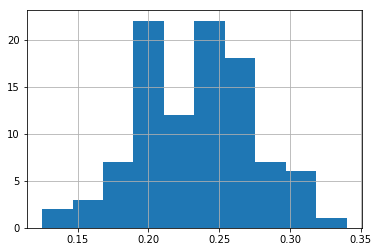

In [16]:
perform_ser.hist()